In [ ]:
import  numpy as np


def loadExData():
    return [[0, 0, 0, 2, 2],
            [0, 5, 0, 3, 3],
            [0, 0, 0, 1, 1],
            [1, 1, 1, 0, 0],
            [2, 1, 2, 4, 0],
            [5, 5, 5, 3, 0],
            [1, 1, 1, 2, 0]]

In [ ]:
def loadExData2():
    return [[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 5],
            [0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 3],
            [0, 0, 0, 0, 4, 0, 0, 1, 0, 4, 0],
            [3, 3, 4, 0, 0, 0, 0, 2, 2, 0, 0],
            [5, 4, 5, 0, 0, 0, 0, 5, 5, 0, 0],
            [0, 0, 0, 0, 5, 0, 1, 0, 0, 5, 0],
            [4, 3, 4, 0, 0, 0, 0, 5, 5, 0, 1],
            [0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4],
            [0, 0, 0, 2, 0, 2, 5, 0, 0, 1, 2],
            [0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0],
            [1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0]]


In [ ]:
def ecludSim(inA,inB):
    return 1.0/(1.0+np.linalg.norm(inA-inB))

In [ ]:
def pearsSim(inA,inB):
    if len(inA)<3:return 1.0
    return 0.5+0.5*np.corrcoef(inA,inB,rowvar=0)[0][1]


In [ ]:
def cosSim(inA,inB):
    num=float(inA.T*inB)
    denom=np.linalg.norm(inA)*np.linalg.norm(inB)
    return 0.5+0.5*(num/denom)


In [ ]:
def standEst(dataMat,user,simMeas,item):
    n=np.shape(dataMat)[1]
    simTotal=0.0;ratSimTotal=0.0
    for j in range(n):
        userRating=dataMat[user,j]
        if userRating==0 or j==item:continue
        overlap=np.nonzero(np.logical_and(dataMat[:,item].A>0,dataMat[:,j].A>0))[0]
        if len(overlap)==0:similarity=0
        else:similarity=simMeas(dataMat[overlap,j],dataMat[overlap,item])
        print('the {:d} and {:d} similarity is:{:.6f}'.format(item,j,similarity))
        simTotal+=similarity
        ratSimTotal+=similarity*userRating
    if simTotal==0:return 0
    else: return ratSimTotal/simTotal


In [ ]:
def recommend(dataMat,user,N=3,simMeas=cosSim,estMethod=standEst):
    unratedItems=np.nonzero(dataMat[user,:].A==0)[1]
    if len(unratedItems)==0:return 'all rated'
    itemScores=[(item,estMethod(dataMat,user,simMeas,item)) for item in unratedItems]
    # itemScores = []
    # for item in unratedItems:
    #     estimatedScore=estMethod(dataMat,user,simMeas,item)
    #     itemScores.append((item,estimatedScore))
    return sorted(itemScores,key=lambda x:x[1],reverse=True)

In [ ]:
def svdEst(dataMat,user,simMeas,item):
    n=np.shape(dataMat)[1]
    simTotal=0.0;ratSimTotal=0.0
    U,Sigma,VT=np.linalg.svd(dataMat)
    Sig4=np.mat(np.eye(4)*Sigma[:4])
    xfromedItems=dataMat.T*U[:,:4]*Sig4.I
    for j in range(n):
        userRating =dataMat[user,j]
        if userRating==0 or j==item: continue
        similarity=simMeas(xfromedItems[item,:].T,xfromedItems[j,:].T)
        print('the {:d} and {:d} similarity is:{:.6f}'.format(item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0:
        return 0
    else:
        return ratSimTotal / simTotal

In [ ]:
def printMat(inMat, thresh=0.8):
    for i in range(32):
        for k in range(32):
            if float(inMat[i,k]) > thresh:
                print(1,end='')   
            else: print(0,end='')
        print (' ')


In [ ]:
def imgCompress(numSV=3, thresh=0.8):
    myl = []
    for line in open(r'0_5.txt').readlines():
        newRow = []
        for i in range(32):
            newRow.append(int(line[i]))
        myl.append(newRow)
    myMat = np.mat(myl)
    print ("****original matrix******")
    printMat(myMat, thresh)
    U,Sigma,VT = np.linalg.svd(myMat)
    SigRecon = np.mat(np.zeros((numSV, numSV)))
    for k in range(numSV):#construct diagonal matrix from vector
        SigRecon[k,k] = Sigma[k]
    reconMat = U[:,:numSV]*SigRecon*VT[:numSV,:]
    print ("****reconstructed matrix using %d singular values******" % numSV)
    printMat(reconMat, thresh)

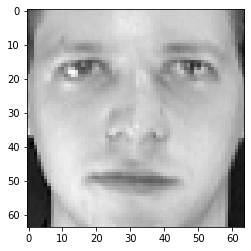

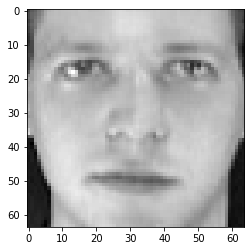

In [ ]:
# -*- coding: utf-8 -*-
 
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from sklearn import datasets
from skimage import io

 
def getImgAsMat(index):
    ds = datasets.fetch_olivetti_faces()
    return np.mat(ds.images[index])
 
def getImgAsMatFromFile(filename):
    img = io.imread(filename, as_grey=True)
    return np.mat(img) 
 
def plotImg(imgMat):
    plt.imshow(imgMat, cmap=plt.cm.gray)
    plt.show()
 
def recoverBySVD(imgMat, k):
    # singular value decomposition
    U, s, V = la.svd(imgMat)
    # choose top k important singular values (or eigens)
    Uk = U[:, 0:k]
    Sk = np.diag(s[0:k])
    Vk = V[0:k, :]
    # recover the image
    imgMat_new = Uk * Sk * Vk
    return imgMat_new
 
 
# -------------------- main --------------------- #
A = getImgAsMat(0)
plotImg(A)
A_new = recoverBySVD(A, 20)
plotImg(A_new)